# Prevendo preços de carros


### Neste módulo iremos usar alguns modelos de regressão para prever preços de carros. Além disso iremos calcular métricas para cada um e no final escolher o que melhor prediz os valores evitando o overfitting.

Antes de tudo faremos os imports das bibliotecas que iremos usar por agora

In [2]:
# 
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
sns.set(style="darkgrid")
# Suppress warnings
warnings.filterwarnings("ignore")
#
dataframe = pd.read_csv(r'D:\Documentos\UFCG\IA\ProjetoPredicao\predicao-precos\true_car_listings.csv')

Seria interessante ter um overview de como está organizado o nosso dataset, para isso vamos printar o nome das colunas:

In [3]:
print(dataframe.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


Ao observar as colunas, avistamos a coluna VIN, esse é o Número de Identificação do Veículo. Esse código serve apenas para própositos de registros. Além disso podemos ter elementos duplicados. Sabendo disto é interessante nós fazermos a primeira filtragem do dataset.

In [4]:
dataframe_filtered = dataframe.drop(['Vin'], axis=1)
dataframe_filtered = dataframe_filtered.drop_duplicates()

Vamos fazer um overview do nosso dataframe filtrado ordenando por preço de forma decrescente com o objetivo de identificar valores muito abaixo ou muito acima, ou seja, outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6bce65208>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6bce65860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6bce74eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6bce65a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6c4abec18>],
 'means': []}

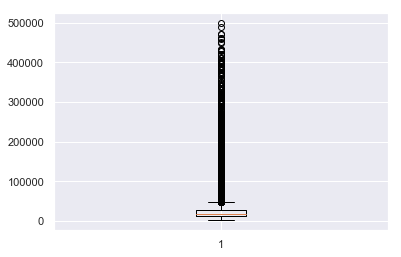

In [5]:
plt.boxplot(dataframe_filtered['Price'])

Com esse gráfico plotado descobrimos 2 coisas:
I) Não temos outliers aparentes
II) A maior parte dos preços são baixos

### Questionamento: Será que o estado influencia no preço dos veículos?

Para responder isso vamos plotar o gráfico da média de preços e ver se existe uma variação considerável para saber se a variável State é importante para nós.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6c648e940>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6c6486080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6c648e7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6c6486780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6c6486b00>],
 'means': []}

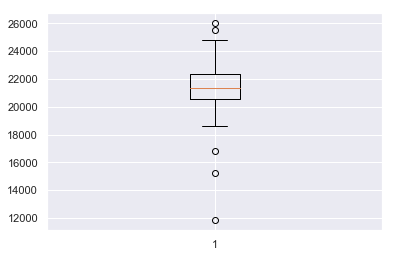

In [6]:
#
df_prices_states = dataframe_filtered[["Price","State"]]
df_prices_states = df_prices_states.groupby("State").mean().reset_index()
df_prices_states = df_prices_states.sort_values(by='Price', ascending=False)

# print(df_prices_states)

plt.boxplot(df_prices_states['Price'])

Observamos que a média de preço dos estados são bem parecidas, logo, inferimos que a média das suas cidades também são parecidas. Com isso podemos retirar as variáveis State e City dos nossos dados.

In [7]:
dataframe_filtered = dataframe_filtered.drop(columns=['City', 'State'], axis=1)
dataframe_filtered = dataframe_filtered.drop_duplicates()
print(dataframe_filtered)

        Price  Year  Mileage   Make         Model
0        8995  2014    35725  Acura    ILX6-Speed
1       10888  2013    19606  Acura    ILX5-Speed
2        8995  2013    48851  Acura    ILX6-Speed
3       10999  2014    39922  Acura    ILX5-Speed
4       14799  2016    22142  Acura  ILXAutomatic
5        7989  2012   105246  Acura  TSXAutomatic
6       14490  2014    34032  Acura    TSXSpecial
7       13995  2013    32384  Acura    TSX5-Speed
8       10495  2013    57596  Acura    ILX6-Speed
9        9995  2013    63887  Acura    ILX5-Speed
10      12921  2012    58550  Acura  TSXAutomatic
11      12000  2013    40527  Acura    ILX5-Speed
12       7750  2009    91980  Acura        TSX4dr
13      17628  2015    13797  Acura    ILX5-Speed
14      13999  2013    35035  Acura    TSX5-Speed
15      14995  2014    23454  Acura    ILX5-Speed
16      14990  2015    23603  Acura    ILX5-Speed
17      14590  2010    19250  Acura        TSX4dr
18       9500  2011    68289  Acura        TSX4dr


### Se preparando para o modelo

Antes de dividirmos nossos dados em treino e teste vamos fazer o hot encoding das nossas variáveis categóricas:

In [8]:
dataframe_filtered['Model'] = dataframe_filtered['Model'].str.replace(',', '')
dataframe_filtered['Model'] = dataframe_filtered['Model'].str.upper()

# print(dataframe_filtered['Model'].str.upper())
# print(pd.get_dummies(dataframe_filtered).columns)

# dataframe_filtered = pd.get_dummies(dataframe_filtered)
dataframe_filtered.to_csv('dataframe_filtered.csv', encoding='utf-8')

In [ ]:
frametest = pd.read_csv(r'D:\Documentos\UFCG\IA\ProjetoPredicao\dataframe_filtered.csv')
print(frametest.shape[0])